<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/S4/mnist%2099_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Define the model architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
      # Sequential is a container of Modules that can be stacked together and run at the same time.
        self.conv1 = nn.Sequential(
            
            nn.Conv2d(1, 16, 3, padding=0),   # i/p = 28x28x1  o/p = 26x26x16  receptive field = 2 
            nn.ReLU(),              # activation function Relu       
            nn.BatchNorm2d(16),     # batch normalization applied to o/p no. of kernels
            
            nn.Conv2d(16, 12, 3, padding=0),  # i/p = 26x26x16  o/p = 24x24x12  receptive field = 4 
            nn.ReLU(),
            nn.BatchNorm2d(12),
            
            nn.Conv2d(12, 12, 3, padding=0),  # i/p = 24x24x12  o/p = 22x22x12  receptive field = 6 
            nn.ReLU(),
            nn.BatchNorm2d(12),
            
            nn.Conv2d(12, 14, 3, padding=0),  # i/p = 22x22x12  o/p = 20x20x14  receptive field = 8
            nn.ReLU(),
            nn.BatchNorm2d(14),

            nn.Conv2d(14, 14, 3, padding=0),   # i/p = 20x20x14  o/p = 18x18x14  receptive field = 10
            nn.ReLU(),
            nn.BatchNorm2d(14),
            
            nn.Conv2d(14, 16, 3, padding=0),  # i/p = 18x18x14  o/p = 16x16x16  receptive field = 12
            nn.ReLU(),
            nn.BatchNorm2d(16),

            nn.Conv2d(16, 16, 3, padding=0),  # i/p = 16x16x16  o/p = 14x14x16  receptive field = 14 
            nn.ReLU(),
            nn.BatchNorm2d(16),

            nn.Conv2d(16, 18, 3, padding=0),  # i/p = 14x14x16  o/p = 12x12x18  receptive field = 16 
            nn.ReLU(),
            nn.BatchNorm2d(18),

            nn.Conv2d(18, 18, 3, padding=0),  # i/p = 12x12x18  o/p = 10x10x18  receptive field = 18 
            nn.ReLU(),
            nn.BatchNorm2d(18),

            nn.Conv2d(18, 10, 3, padding=0),  # i/p = 10x10x18  o/p = 8x8x10  receptive field = 20 
            
            nn.AdaptiveAvgPool2d(1)           # i/p = 8x8x10  o/p = 1x1x10
            
        )

    def forward(self, x):

        x = self.conv1(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)





In [53]:
# display the model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()  # cuda used for parallel processing 
device = torch.device("cuda" if use_cuda else "cpu") # gpu is used if cuda is available
model = Net().to(device)
summary(model, input_size=(1, 28, 28)) # size of each mnist image is 28x28

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 12, 24, 24]           1,740
              ReLU-5           [-1, 12, 24, 24]               0
       BatchNorm2d-6           [-1, 12, 24, 24]              24
            Conv2d-7           [-1, 12, 22, 22]           1,308
              ReLU-8           [-1, 12, 22, 22]               0
       BatchNorm2d-9           [-1, 12, 22, 22]              24
           Conv2d-10           [-1, 14, 20, 20]           1,526
             ReLU-11           [-1, 14, 20, 20]               0
      BatchNorm2d-12           [-1, 14, 20, 20]              28
           Conv2d-13           [-1, 14, 18, 18]           1,778
             ReLU-14           [-1, 14,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:


torch.manual_seed(1)
batch_size = 64

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
# Load the train dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

# Load the test dataset
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


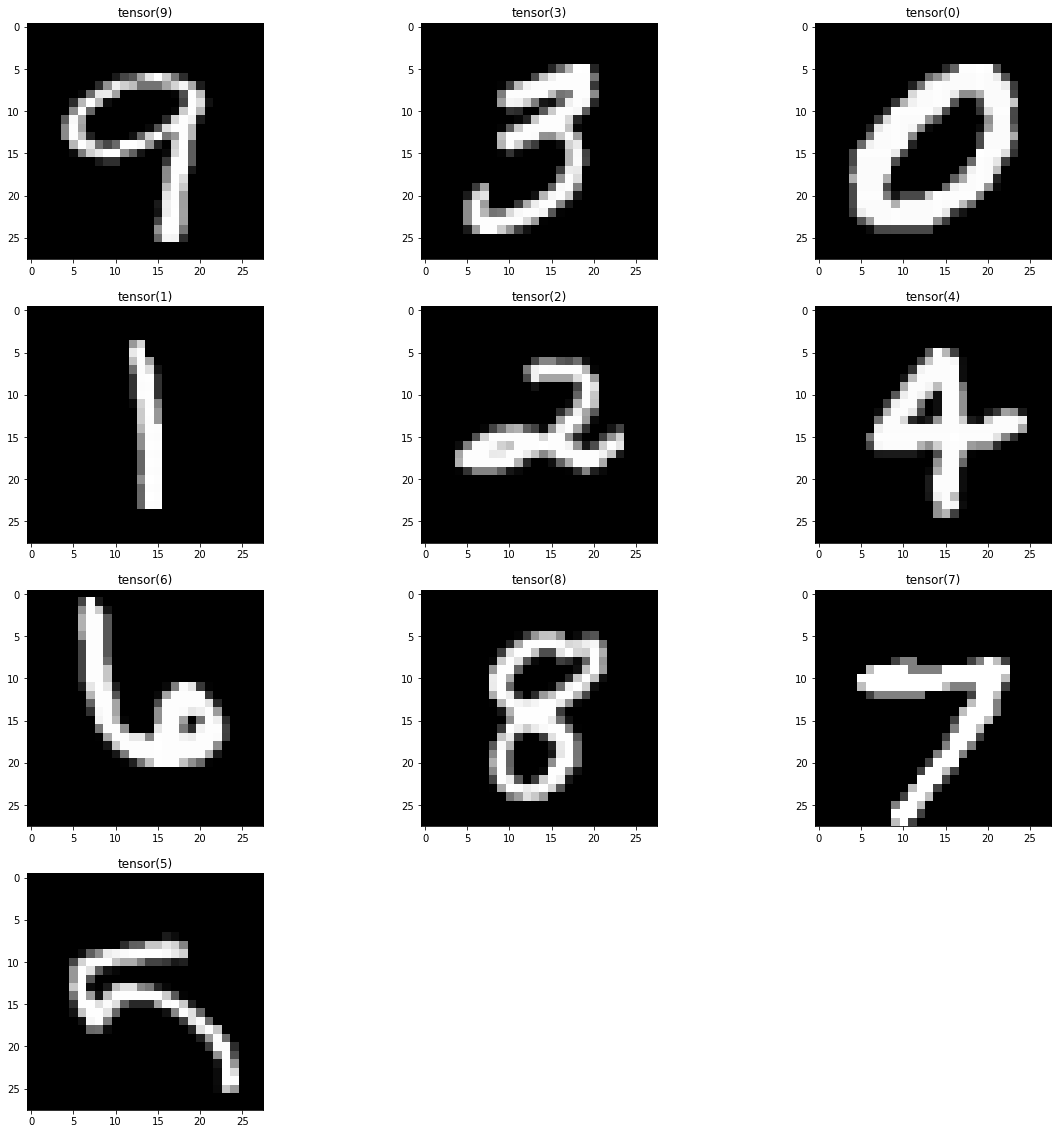

In [55]:
# displaying an image from each class

classes = range(10)
imgs, lbls = next(iter(train_loader))

nos = [0,1,2,3,4,5,6,7,8,9]
j=0
fig = plt.figure(figsize=(20,20)) 
for i in range(len(imgs)):
  if classes[lbls[i]] in nos: 
    ax = fig.add_subplot(4,3 , 1 + j) # 4 rows, 3 columns, 1+j is the index which gives position of each image in the plot
    plt.imshow(imgs[i].data.reshape((28,28)), cmap="gray") # display the image
    ax.set_title(lbls[i]) # give the class of the image as its title
    nos.remove(classes[lbls[i]]) # remove the class which was just displayed
    j+=1

  
plt.show()

In [0]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'epoch= {epoch} loss={loss.item()} batch_id={batch_idx}')

# Display the training accuracy
def train_eval(model, device, train_loader):
    model.eval()
    # train_loss = 0
    train_correct = 0
    with torch.no_grad():
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # train_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            train_correct += pred.eq(target.view_as(pred)).sum().item()

    # train_loss /= len(train_loader.dataset)

    print('\ntrain set: Accuracy: {}/{} ({:.2f}%)\n'.format(
         train_correct, len(train_loader.dataset),
        100. * train_correct / len(train_loader.dataset)))
    
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [57]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # optimizer

# trrain the model for 19 epochs
for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    train_eval(model, device, train_loader)
    test(model, device, test_loader)

epoch= 1 loss=0.08253111690282822 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 55.32it/s]



train set: Accuracy: 59031/60000 (98.39%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0491, Accuracy: 9853/10000 (98.53%)



epoch= 2 loss=0.013916954398155212 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.62it/s]



train set: Accuracy: 59342/60000 (98.90%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9895/10000 (98.95%)



epoch= 3 loss=0.023232385516166687 batch_id=937: 100%|██████████| 938/938 [00:17<00:00, 54.36it/s]



train set: Accuracy: 59287/60000 (98.81%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0387, Accuracy: 9867/10000 (98.67%)



epoch= 4 loss=0.0009537786245346069 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.30it/s]



train set: Accuracy: 59459/60000 (99.10%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9905/10000 (99.05%)



epoch= 5 loss=0.03427477180957794 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 55.28it/s]



train set: Accuracy: 59620/60000 (99.37%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9928/10000 (99.28%)



epoch= 6 loss=0.0808941051363945 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.38it/s]



train set: Accuracy: 59632/60000 (99.39%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)



epoch= 7 loss=0.04094497859477997 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 55.26it/s]



train set: Accuracy: 59547/60000 (99.25%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9912/10000 (99.12%)



epoch= 8 loss=0.05311623215675354 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 58.34it/s]



train set: Accuracy: 59711/60000 (99.52%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.33%)



epoch= 9 loss=0.002993077039718628 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 55.97it/s]



train set: Accuracy: 59678/60000 (99.46%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9913/10000 (99.13%)



epoch= 10 loss=0.012350693345069885 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 55.59it/s]



train set: Accuracy: 59678/60000 (99.46%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9924/10000 (99.24%)



epoch= 11 loss=0.0900462418794632 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 56.52it/s]



train set: Accuracy: 59735/60000 (99.56%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9923/10000 (99.23%)



epoch= 12 loss=0.002442076802253723 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.69it/s]



train set: Accuracy: 59805/60000 (99.67%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9935/10000 (99.35%)



epoch= 13 loss=0.03480947017669678 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.62it/s]



train set: Accuracy: 59771/60000 (99.62%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9928/10000 (99.28%)



epoch= 14 loss=0.00037735700607299805 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.41it/s]



train set: Accuracy: 59806/60000 (99.68%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9931/10000 (99.31%)



epoch= 15 loss=0.22490671277046204 batch_id=937: 100%|██████████| 938/938 [00:15<00:00, 58.66it/s]



train set: Accuracy: 59809/60000 (99.68%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9930/10000 (99.30%)



epoch= 16 loss=0.00037407875061035156 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 57.13it/s]



train set: Accuracy: 59824/60000 (99.71%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9930/10000 (99.30%)



epoch= 17 loss=0.00014138221740722656 batch_id=937: 100%|██████████| 938/938 [00:15<00:00, 59.11it/s]



train set: Accuracy: 59811/60000 (99.69%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9935/10000 (99.35%)



epoch= 18 loss=0.010026156902313232 batch_id=937: 100%|██████████| 938/938 [00:16<00:00, 56.82it/s]



train set: Accuracy: 59846/60000 (99.74%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9931/10000 (99.31%)



epoch= 19 loss=0.003623664379119873 batch_id=937: 100%|██████████| 938/938 [00:15<00:00, 61.77it/s]



train set: Accuracy: 59839/60000 (99.73%)


Test set: Average loss: 0.0202, Accuracy: 9940/10000 (99.40%)

